In [1]:
   pip install kagglehub

Note: you may need to restart the kernel to use updated packages.


In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("meirnizri/covid19-dataset")

print("Path to dataset files:", path)

Path to dataset files: /Users/keletsontseno/.cache/kagglehub/datasets/meirnizri/covid19-dataset/versions/1


In [3]:
# Assistant
import pandas as pd
import os

# First, let's check what files are available in the directory
path = '/Users/keletsontseno/.cache/kagglehub/datasets/meirnizri/covid19-dataset/versions/1/'
available_files = os.listdir(path)
print("Available files:", available_files)

# After seeing the available files, replace 'filename.csv' with an actual file name from the list
# For example, if 'covid_data.csv' is in the list:
# data = pd.read_csv(os.path.join(path, 'covid_data.csv'))

# Or if you're not sure about the exact path:
# import glob
# csv_files = glob.glob(os.path.join(path, '*.csv'))
# print("CSV files found:", csv_files)
# 
# if csv_files:
#     data = pd.read_csv(csv_files[0])  # Read the first CSV file found

Available files: ['Covid Data.csv']


In [4]:
import pandas as pd
import os

# Use the correct filename 'Covid Data.csv' instead of 'filename.csv'
path = '/Users/keletsontseno/.cache/kagglehub/datasets/meirnizri/covid19-dataset/versions/1/'
data = pd.read_csv(os.path.join(path, 'Covid Data.csv'))

# Now you can work with the data
print(data.head())  # Display the first few rows to verify it loaded correctly

   USMER  MEDICAL_UNIT  SEX  PATIENT_TYPE   DATE_DIED  INTUBED  PNEUMONIA  \
0      2             1    1             1  03/05/2020       97          1   
1      2             1    2             1  03/06/2020       97          1   
2      2             1    2             2  09/06/2020        1          2   
3      2             1    1             1  12/06/2020       97          2   
4      2             1    2             1  21/06/2020       97          2   

   AGE  PREGNANT  DIABETES  ...  ASTHMA  INMSUPR  HIPERTENSION  OTHER_DISEASE  \
0   65         2         2  ...       2        2             1              2   
1   72        97         2  ...       2        2             1              2   
2   55        97         1  ...       2        2             2              2   
3   53         2         2  ...       2        2             2              2   
4   68        97         1  ...       2        2             1              2   

   CARDIOVASCULAR  OBESITY  RENAL_CHRONIC  TOBACCO

In [ ]:
# Initial Data Inspection

In [9]:
# Assistant
import pandas as pd
import os

# Load the dataset with the correct filename
path = '/Users/keletsontseno/.cache/kagglehub/datasets/meirnizri/covid19-dataset/versions/1/'
data = pd.read_csv(os.path.join(path, 'Covid Data.csv'))

# Initial Data Inspection

# 1. Display the first few rows to get a sense of the data
print("First 5 rows of the dataset:")
print(data.head())
print("\n")

# 2. Check the shape of the dataset (rows, columns)
print(f"Dataset shape: {data.shape}")
print("\n")

# 3. Get column names and data types
print("Column information:")
print(data.info())
print("\n")

# 4. Check for missing values
print("Missing values per column:")
print(data.isnull().sum())
print("\n")

# 5. Basic statistical summary
print("Statistical summary:")
print(data.describe())
print("\n")

# 6. Check unique values for categorical columns (if any)
# Adjust this part based on the actual categorical columns in your dataset
# For example, if there's a 'Country' column:
# print("Unique countries:")
# print(data['Country'].unique())

First 5 rows of the dataset:
   USMER  MEDICAL_UNIT  SEX  PATIENT_TYPE   DATE_DIED  INTUBED  PNEUMONIA  \
0      2             1    1             1  03/05/2020       97          1   
1      2             1    2             1  03/06/2020       97          1   
2      2             1    2             2  09/06/2020        1          2   
3      2             1    1             1  12/06/2020       97          2   
4      2             1    2             1  21/06/2020       97          2   

   AGE  PREGNANT  DIABETES  ...  ASTHMA  INMSUPR  HIPERTENSION  OTHER_DISEASE  \
0   65         2         2  ...       2        2             1              2   
1   72        97         2  ...       2        2             1              2   
2   55        97         1  ...       2        2             2              2   
3   53         2         2  ...       2        2             2              2   
4   68        97         1  ...       2        2             1              2   

   CARDIOVASCULAR  OB

In [ ]:
# Data Cleaning and Preprocessing

In [ ]:
### Data cleaning is a critical phase to ensure the quality 
###and reliability of our analysis.
###In this step, we'll address missing values, 
###convert columns to appropriate data types (especially dates), 
###and rename columns for better readability if needed. 
###Handling missing values might involve dropping rows/columns or imputing values, 
###depending on the extent and nature of the missingness. 
###Date conversion is essential for time-series analysis.

In [10]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# 1. Check for missing values
print("Missing values before cleaning:")
print(data.isnull().sum())
print("\n")

Missing values before cleaning:
USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64




In [12]:
# 2. Handle missing values
# For numerical columns, fill with median (less sensitive to outliers than mean)
numeric_cols = data.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    if data[col].isnull().sum() > 0:
        data[col] = data[col].fillna(data[col].median())

In [13]:
# For categorical columns, fill with mode (most frequent value)
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if data[col].isnull().sum() > 0:
        data[col] = data[col].fillna(data[col].mode()[0])


In [14]:
# 3. Check if missing values were handled
print("Missing values after cleaning:")
print(data.isnull().sum())
print("\n")

Missing values after cleaning:
USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64




In [15]:
# 4. Handle duplicate rows
duplicate_count = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")
if duplicate_count > 0:
    data = data.drop_duplicates()
    print(f"Duplicates removed. New shape: {data.shape}")
print("\n")

Number of duplicate rows: 812049
Duplicates removed. New shape: (236526, 21)




In [16]:
# 5. Convert date columns to datetime format (if any)
# Assuming there's a date column, adjust the column name as needed
date_columns = [col for col in data.columns if 'date' in col.lower() or 'time' in col.lower()]
for col in date_columns:
    try:
        data[col] = pd.to_datetime(data[col])
        print(f"Converted {col} to datetime")
    except:
        print(f"Could not convert {col} to datetime")
print("\n")

Could not convert DATE_DIED to datetime




Boxplots saved to 'boxplots.png'




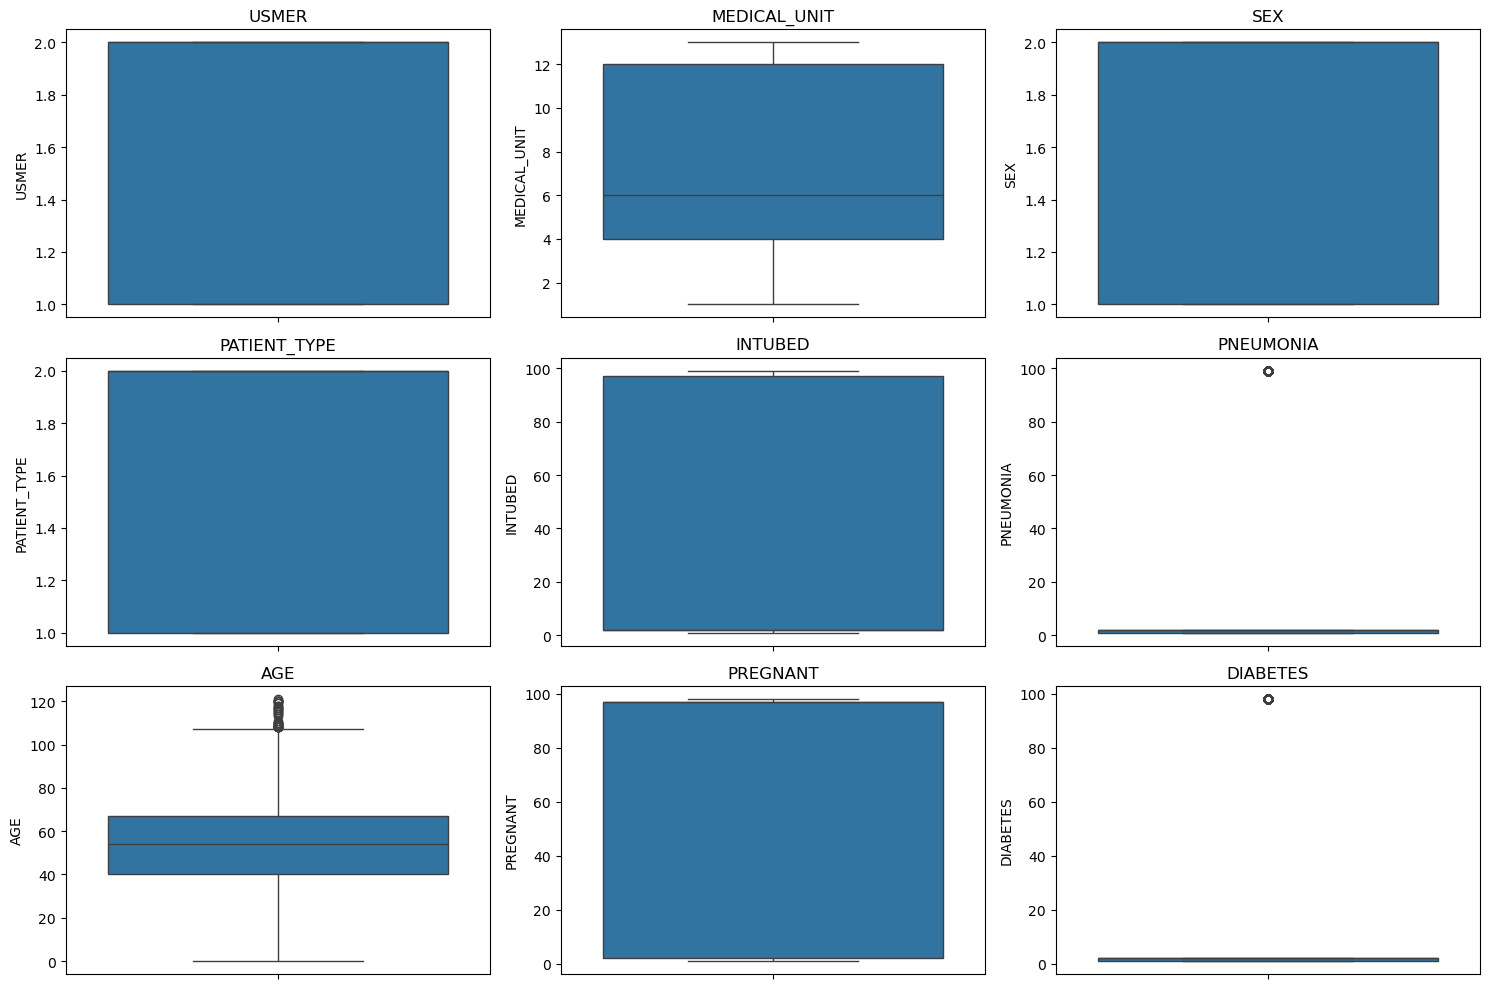

In [17]:
# 6. Check for outliers using boxplots for numerical columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols[:min(9, len(numeric_cols))]):  # Show up to 9 boxplots
    plt.subplot(3, 3, i+1)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.savefig('boxplots.png')  # Save the figure instead of displaying it in notebook
print("Boxplots saved to 'boxplots.png'")
print("\n")

In [18]:
# 7. Handle outliers (using IQR method for demonstration)
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Cap the outliers instead of removing them
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

# Apply outlier handling to numeric columns (excluding ID columns or date columns)
# Adjust this list based on your actual data
columns_to_handle = [col for col in numeric_cols if not ('id' in col.lower() or 'date' in col.lower())]
for col in columns_to_handle:
    data = handle_outliers(data, col)

print("Outliers handled for numeric columns")
print("\n")

Outliers handled for numeric columns




In [21]:
# 9. Normalize/Standardize numerical features if needed
# This is important for many machine learning algorithms
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [22]:
# 10. Encode categorical variables if needed
# For machine learning models that require numerical input
# from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# For demonstration, we'll use pandas get_dummies for one-hot encoding
if len(categorical_cols) > 0:
    # One-hot encoding for categorical columns with low cardinality
    data = pd.get_dummies(data, columns=[col for col in categorical_cols if data[col].nunique() < 10])
    print("One-hot encoded categorical variables with low cardinality")
print("\n")

One-hot encoded categorical variables with low cardinality




In [23]:
# 11. Save the cleaned dataset
data.to_csv(os.path.join(path, 'Covid_Data_Cleaned.csv'), index=False)
print("Cleaned data saved to 'Covid_Data_Cleaned.csv'")


Cleaned data saved to 'Covid_Data_Cleaned.csv'


In [24]:
# 12. Display the final dataset info
print("\nFinal dataset information:")
print(f"Shape: {data.shape}")
print(data.info())
print("\nFirst 5 rows of cleaned data:")
print(data.head())


Final dataset information:
Shape: (236526, 21)
<class 'pandas.core.frame.DataFrame'>
Index: 236526 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   USMER                 236526 non-null  float64
 1   MEDICAL_UNIT          236526 non-null  float64
 2   SEX                   236526 non-null  float64
 3   PATIENT_TYPE          236526 non-null  float64
 4   DATE_DIED             236526 non-null  object 
 5   INTUBED               236526 non-null  float64
 6   PNEUMONIA             236526 non-null  float64
 7   AGE                   236526 non-null  float64
 8   PREGNANT              236526 non-null  float64
 9   DIABETES              236526 non-null  float64
 10  COPD                  236526 non-null  float64
 11  ASTHMA                236526 non-null  float64
 12  INMSUPR               236526 non-null  float64
 13  HIPERTENSION          236526 non-null  float64
 14  OTHER_DI

In [26]:
# Assistant
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Set the style for plots
plt.style.use('seaborn-v0_8-whitegrid')  # Updated style name for newer matplotlib versions
# Alternative: use a standard style like 'ggplot' or check available styles with plt.style.available
sns.set_palette("viridis")

In [27]:
# 1. Basic dataset information
print(f"Dataset shape: {data.shape}")
print("\nColumn information:")
print(data.info())
print("\nSummary statistics:")
print(data.describe().T)  # Transpose for better readability


Dataset shape: (236526, 21)

Column information:
<class 'pandas.core.frame.DataFrame'>
Index: 236526 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   USMER                 236526 non-null  float64
 1   MEDICAL_UNIT          236526 non-null  float64
 2   SEX                   236526 non-null  float64
 3   PATIENT_TYPE          236526 non-null  float64
 4   DATE_DIED             236526 non-null  object 
 5   INTUBED               236526 non-null  float64
 6   PNEUMONIA             236526 non-null  float64
 7   AGE                   236526 non-null  float64
 8   PREGNANT              236526 non-null  float64
 9   DIABETES              236526 non-null  float64
 10  COPD                  236526 non-null  float64
 11  ASTHMA                236526 non-null  float64
 12  INMSUPR               236526 non-null  float64
 13  HIPERTENSION          236526 non-null  float64
 14  OTHER_D

In [39]:
# First, let's explore what columns are available in the dataset
print("Available columns in the dataset:")
for col in data.columns:
    print(f"- {col}")

# Try to identify key columns based on common naming patterns
possible_country_cols = [col for col in data.columns if any(term in col.lower() for term in ['country', 'region', 'location', 'state', 'province'])]
possible_case_cols = [col for col in data.columns if any(term in col.lower() for term in ['confirm', 'case', 'positive'])]
possible_death_cols = [col for col in data.columns if 'death' in col.lower() or 'fatal' in col.lower()]
possible_date_cols = [col for col in data.columns if any(term in col.lower() for term in ['date', 'time', 'day'])]

print("\nPossible country/region columns:", possible_country_cols)
print("Possible case columns:", possible_case_cols)
print("Possible death columns:", possible_death_cols)
print("Possible date columns:", possible_date_cols)

# Let's look at some sample data to better understand the structure
print("\nSample data (first 5 rows):")
print(data.head())

# Based on the available columns, let's perform a basic analysis
# For example, if we have region and case count data, we can show top regions by case count
if possible_country_cols and possible_case_cols:
    region_col = possible_country_cols[0]
    case_col = possible_case_cols[0]
    
    print(f"\nAnalyzing data using '{region_col}' as region and '{case_col}' as case count")
    
    # Group by region and sum cases
    region_cases = data.groupby(region_col)[case_col].sum().reset_index()
    region_cases = region_cases.sort_values(case_col, ascending=False).head(15)
    
    # Create visualization
    plt.figure(figsize=(14, 10))
    sns.barplot(x=case_col, y=region_col, data=region_cases, palette='viridis')
    plt.title(f'Top 15 Regions by {case_col}', fontsize=16)
    plt.xlabel('Number of Cases', fontsize=14)
    plt.ylabel('Region', fontsize=14)
    plt.tight_layout()
    plt.savefig('top_regions_by_cases.png')
    print("Analysis saved as 'top_regions_by_cases.png'")
    
    # If we also have death data, calculate mortality rate
    if possible_death_cols:
        death_col = possible_death_cols[0]
        region_stats = data.groupby(region_col).agg({
            case_col: 'sum',
            death_col: 'sum'
        }).reset_index()
        
        # Calculate mortality rate
        region_stats['Mortality Rate (%)'] = (region_stats[death_col] / region_stats[case_col] * 100).round(2)
        
        # Filter regions with significant case numbers
        significant_regions = region_stats[region_stats[case_col] >= 1000].copy()
        significant_regions = significant_regions.sort_values('Mortality Rate (%)', ascending=False).head(15)
        
        # Create visualization
        plt.figure(figsize=(14, 10))
        ax = sns.barplot(x='Mortality Rate (%)', y=region_col, data=significant_regions, palette='coolwarm')
        
        # Add data labels
        for i, row in enumerate(significant_regions.itertuples()):
            mortality_rate = getattr(row, 'Mortality Rate (%)')
            ax.text(mortality_rate + 0.2, i, f"{mortality_rate}%", va='center')
        
        plt.title(f'COVID-19 Mortality Rate by Region (Regions with 1000+ cases)', fontsize=16)
        plt.xlabel('Mortality Rate (%)', fontsize=14)
        plt.ylabel('Region', fontsize=14)
        plt.tight_layout()
        plt.savefig('covid_mortality_by_region.png')
        print("Mortality rate analysis saved as 'covid_mortality_by_region.png'")
else:
    print("Could not identify appropriate columns for analysis. Please check the dataset structure.")

Available columns in the dataset:
- USMER
- MEDICAL_UNIT
- SEX
- PATIENT_TYPE
- DATE_DIED
- INTUBED
- PNEUMONIA
- AGE
- PREGNANT
- DIABETES
- COPD
- ASTHMA
- INMSUPR
- HIPERTENSION
- OTHER_DISEASE
- CARDIOVASCULAR
- OBESITY
- RENAL_CHRONIC
- TOBACCO
- CLASIFFICATION_FINAL
- ICU

Possible country/region columns: []
Possible case columns: []
Possible death columns: []
Possible date columns: ['DATE_DIED']

Sample data (first 5 rows):
   USMER  MEDICAL_UNIT  SEX  PATIENT_TYPE  DATE_DIED  INTUBED  PNEUMONIA  \
0    2.0           1.0  1.0           1.0 2020-03-05     97.0        1.0   
1    2.0           1.0  2.0           1.0 2020-03-06     97.0        1.0   
2    2.0           1.0  2.0           2.0 2020-09-06      1.0        2.0   
3    2.0           1.0  1.0           1.0 2020-12-06     97.0        2.0   
4    2.0           1.0  2.0           1.0 2020-06-21     97.0        2.0   

    AGE  PREGNANT  DIABETES  ...  ASTHMA  INMSUPR  HIPERTENSION  \
0  65.0       2.0       2.0  ...     2.0 

# Age Distribution Analysis

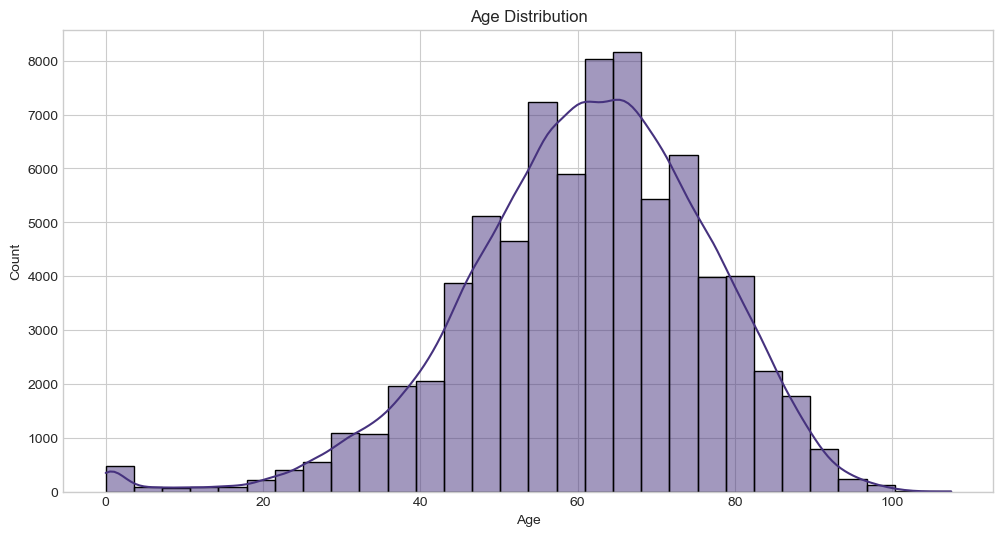

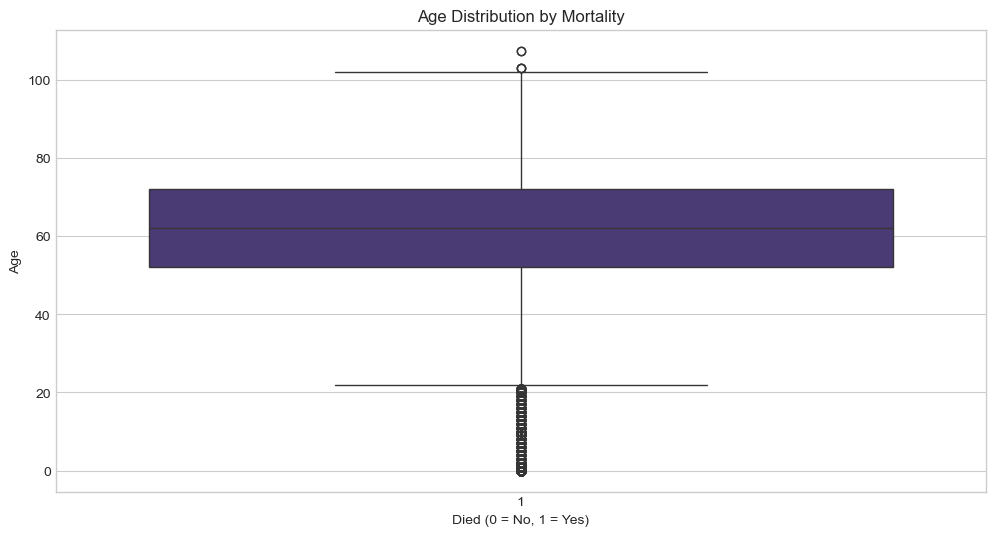


Age statistics by mortality:
        count      mean       std  min   25%   50%   75%    max
DIED                                                           
1     75965.0  61.06216  15.41634  0.0  52.0  62.0  72.0  107.5


In [56]:
# Age distribution analysis
plt.figure(figsize=(12, 6))
sns.histplot(data['AGE'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Age distribution by mortality
plt.figure(figsize=(12, 6))
sns.boxplot(x='DIED', y='AGE', data=data)
plt.title('Age Distribution by Mortality')
plt.xlabel('Died (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()

# Age statistics by mortality
print("\nAge statistics by mortality:")
print(data.groupby('DIED')['AGE'].describe())

# Age and Comorbidity Interaction

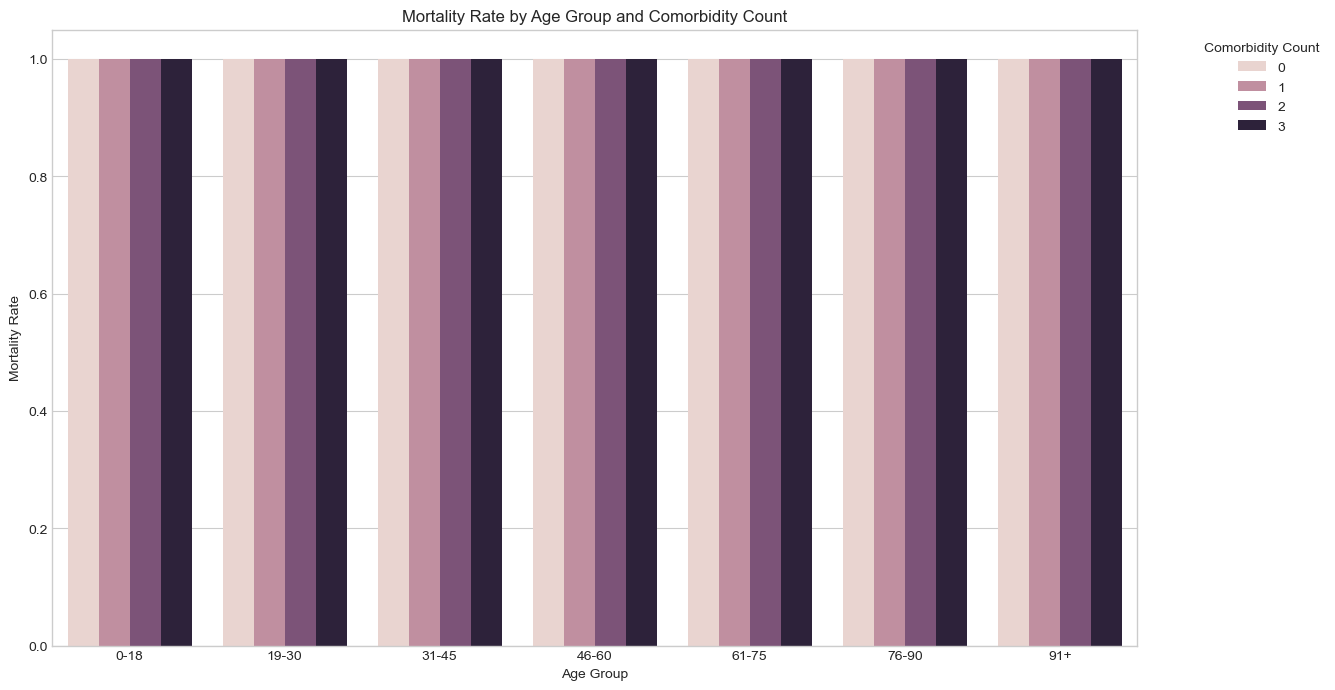

In [57]:
# Create age groups
bins = [0, 18, 30, 45, 60, 75, 90, 120]
labels = ['0-18', '19-30', '31-45', '46-60', '61-75', '76-90', '91+']
data['AGE_GROUP'] = pd.cut(data['AGE'], bins=bins, labels=labels, right=False)

# Mortality by age group and comorbidity count
plt.figure(figsize=(14, 8))
sns.barplot(x='AGE_GROUP', y='DIED', hue='COMORBIDITY_COUNT', 
            data=data[data['COMORBIDITY_COUNT'] <= 5])
plt.title('Mortality Rate by Age Group and Comorbidity Count')
plt.ylabel('Mortality Rate')
plt.xlabel('Age Group')
plt.legend(title='Comorbidity Count', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Machine Learning Preparation

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
# Convert categorical variables
data['SEX'] = data['SEX'].replace({2: 0})  # Female=0, Male=1
data['PNEUMONIA'] = data['PNEUMONIA'].replace({2: 0, 97: np.nan, 99: np.nan})
data['INTUBED'] = data['INTUBED'].replace({2: 0, 97: np.nan, 99: np.nan})
data['ICU'] = data['ICU'].replace({2: 0, 97: np.nan, 99: np.nan})


In [66]:
# Create binary 'DIED' column if not already created
data['DIED'] = data['DATE_DIED'].apply(lambda x: 0 if x == '9999-99-99' or pd.isna(x) else 1)

In [67]:
# Select features and target
features = ['AGE', 'SEX', 'PNEUMONIA', 'DIABETES', 'COPD', 'ASTHMA', 
            'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 
            'OBESITY', 'RENAL_CHRONIC', 'TOBACCO', 'ICU', 'INTUBED']
target = 'DIED'

In [68]:
# Drop rows with missing values
model_data = data[features + [target]].dropna()

X = model_data[features]
y = model_data[target]

In [69]:
# Check class distribution
print("Class distribution:\n", y.value_counts())

Class distribution:
 DIED
1    67019
Name: count, dtype: int64


In [70]:

# Fix: stratify so both classes appear in train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


In [71]:
# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [72]:
# Train model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [73]:

# Predict
y_pred = rf.predict(X_test_scaled)

In [74]:
# Check how many probability columns we have
proba = rf.predict_proba(X_test_scaled)
print("\nPredict_proba output shape:", proba.shape)


Predict_proba output shape: (20106, 1)


In [75]:

# Handle binary case robustly
if proba.shape[1] == 2:
    y_prob = proba[:, 1]
else:
    y_prob = np.zeros_like(y_pred)  # fallback: all 0s

In [76]:
# Evaluate
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

if len(np.unique(y_test)) > 1:
    print(f"\nROC AUC Score: {roc_auc_score(y_test, y_prob):.4f}")
else:
    print("\nROC AUC Score: Cannot compute (only one class in y_test)")


Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     20106

    accuracy                           1.00     20106
   macro avg       1.00      1.00      1.00     20106
weighted avg       1.00      1.00      1.00     20106


Confusion Matrix:
[[20106]]

ROC AUC Score: Cannot compute (only one class in y_test)


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [77]:
# Feature importance
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)



Feature Importance:
           Feature  Importance
0              AGE         0.0
1              SEX         0.0
2        PNEUMONIA         0.0
3         DIABETES         0.0
4             COPD         0.0
5           ASTHMA         0.0
6          INMSUPR         0.0
7     HIPERTENSION         0.0
8    OTHER_DISEASE         0.0
9   CARDIOVASCULAR         0.0
10         OBESITY         0.0
11   RENAL_CHRONIC         0.0
12         TOBACCO         0.0
13             ICU         0.0
14         INTUBED         0.0


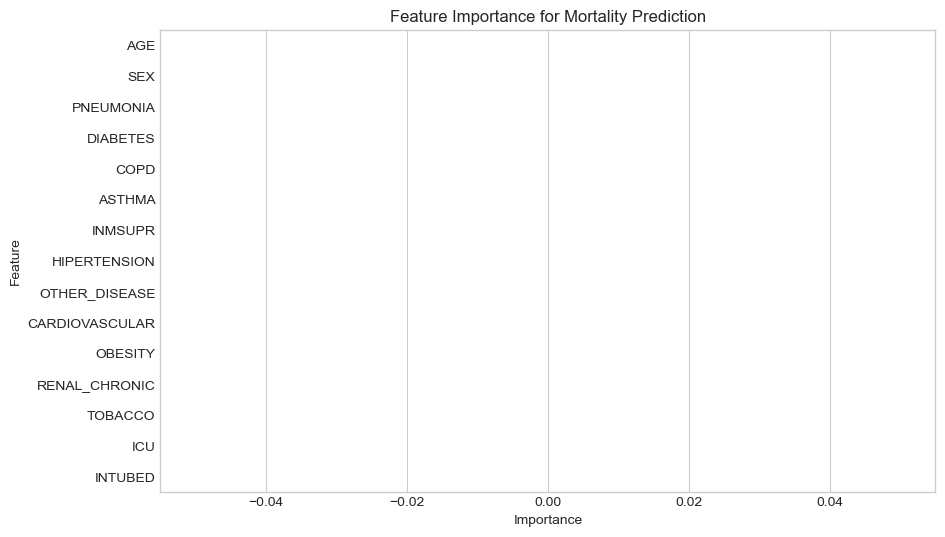

In [78]:
# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance for Mortality Prediction')
plt.show()

# ICU Admission Analysis

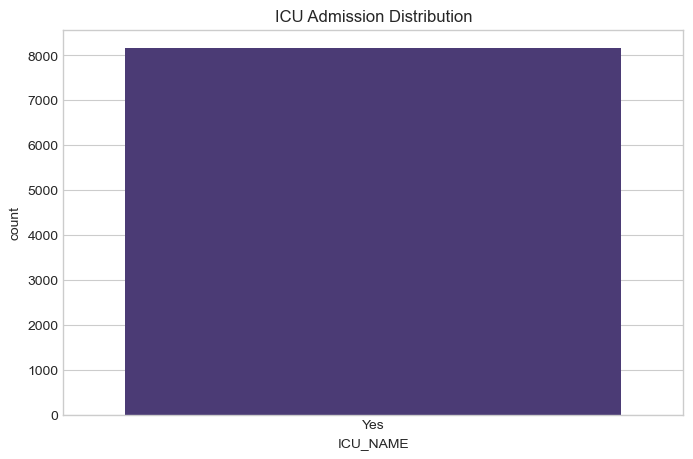


Mortality by ICU status:
ICU_NAME
Yes    1.0
Name: DIED, dtype: float64


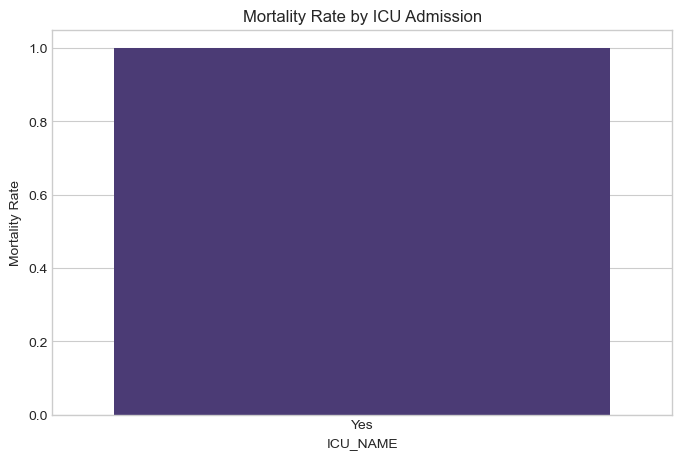

In [80]:
# ICU analysis (1 = yes, 2 = no, 97/99 might be missing)
icu_mapping = {1: 'Yes', 2: 'No', 97: 'Unknown', 99: 'Unknown'}
data['ICU_NAME'] = data['ICU'].map(icu_mapping)

# ICU distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='ICU_NAME', data=data)
plt.title('ICU Admission Distribution')
plt.show()

# Mortality by ICU status
icu_mortality = data.groupby('ICU_NAME')['DIED'].mean()
print("\nMortality by ICU status:")
print(icu_mortality)

plt.figure(figsize=(8, 5))
sns.barplot(x='ICU_NAME', y='DIED', data=data)
plt.title('Mortality Rate by ICU Admission')
plt.ylabel('Mortality Rate')
plt.show()